# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 9383 Рыбников Роман и Сергиенкова Анастасия. Вариант №9

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

$\bullet$ В данной лабораторной работе в качестве временного ряда рассматривается дискретный сигнал с шагом дискретизации равным единице

$\bullet$ Полиномиальное сглаживание - это аппроксимация в смысле МНК значений конечного (нечетного) числа элементов сглаживаемого ряда полиномом заданного порядка с присвоением среднему из этих элементов значения сглаживающего полинома в центре выбранного временного отрезка. Такой подход соответствует сглаживанию в скользящем окне.

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров,соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\displaystyle \tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi

In [2]:
t = np.linspace(0.001, 1, 500)

def plot(df, title="None"):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=df, x='t', y='vals', hue='', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
    ax.set_axis_labels(r'$t$', r'$\tilde H(t)$')
    plt.title(title)
    plt.show()
    
def plot_log(df_log, title="None_log"):
    ax = sns.relplot(data=df_log, x='t', y='vals', hue='', linewidth=1.7,
                     kind='line', height=8.27, aspect=11.7 / 8.27)
    ax.set_axis_labels(r'$t$', r'$\tilde H(t), Дб$')
    plt.title(title)
    plt.show()

### Пункт 1

$\bullet$ Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\displaystyle \tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

$$\text{Входной сигнал: } s(t) $$

$$\text{Выходной сигнал: } y(t) = A + Bt $$

Если осуществлять приближение по МНК прямой линией по $m$ точкам, то необходимо минимизировать следующее выражение для нечётных чисел:

$$\displaystyle F(A, B) = \sum_{k=-m}^m \big(s_k - A - Bk\big)^2 \rightarrow min$$

Дифференицурем выражение по аргументам $A, B$ и, приравнивая полученные уравнения к нулю, формируем $2$ нормальных уравнения:

$$
\begin{cases}
    \displaystyle \frac{\partial F(A,B)}{\partial A} = 0       \\
    \displaystyle \frac{\partial F(A,B)}{\partial B} = 0
  \end{cases} \iff 
  \begin{cases}
    \displaystyle -2 \sum_{k=-m}^m \big(s_k - A - Bk\big) = 0       \\
    \displaystyle -2 \sum_{k=-m}^m \big(ks_k - kA - Bk^2\big) = 0
  \end{cases} \iff 
  \begin{cases}
    \displaystyle \sum_{k=-m}^m s_k - A \sum_{k=-m}^m 1 - B \sum_{k=-m}^m k = 0       \\
    \displaystyle \sum_{k=-m}^m ks_k - A \sum_{k=-m}^m k - B \sum_{k=-m}^m k^2 = 0
  \end{cases} $$ 

Учитывая $\displaystyle \sum_{k=-m}^m k = 0$ решим уравнения относительно $A, B$

Система нормальных уравнений:

$$
\begin{cases}
    \displaystyle A = \frac{1}{2m + 1} \cdot \sum_{k=-m}^m s_k       \\
    \displaystyle B = \frac{\sum_{k=-m}^m s_k}{\sum_{k=-m}^m k^2}
  \end{cases}$$

Получаем:

$$\displaystyle y_0 = A = \frac{1}{2m + 1} \sum_{k=-m}^m s_k = \frac{1}{2m + 1} \sum_{k=-m} \big(s_{-m} + s_{-m+1} + \dots + s_{m-1}+s_m\big)$$

$$\displaystyle y_n = \frac{1}{2m + 1} \sum_{k=-m}^m s_k = \frac{1}{2m + 1} \sum_{k=-m}^m \big(s_{-m+n} + s_{-m+1+n} + \dots + s_{m-1+n}+s_{m+n}\big)$$

$$\displaystyle s_n = e^{i\omega n}$$

$$\displaystyle y_n = \frac{1}{2m + 1} \sum_{k=-m}^m \big(e^{-mi\omega} + e^{(-m+1)i\omega} + \dots + e^{(m-1)i\omega}+e^{mi\omega}\big) = H(\omega)$$

$$\displaystyle H(\omega) = \frac{1}{2m + 1} \sum_{k=-m}^m = \big(1 + 2 \cdot cos(\omega) + 2 \cdot cos(2\omega) + \dots + 2 \cdot cos(m\omega)\big)$$

$$\displaystyle H(\omega) = \frac{sin\Big(\frac{(2m + 1)\cdot\omega}{2}\Big)}{\big(2m+1\big)\cdot sin\big(\frac{\omega}{2}\big)}$$

$$\displaystyle H(\omega) = H(2\pi f) = \tilde H(f)$$

Формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам:

$$\displaystyle H_n(f) = \frac{sin(n\cdot\pi f)}{n\cdot sin(\pi f)}$$

, где $n$ - это количество точек

In [3]:
H_3 = lambda f: (np.sin(3*pi*f))/(3*np.sin(pi*f))
H_5 = lambda f: (np.sin(5*pi*f))/(5*np.sin(pi*f))
H_7 = lambda f: (np.sin(7*pi*f))/(7*np.sin(pi*f))
H_9 = lambda f: (np.sin(9*pi*f))/(9*np.sin(pi*f))

In [4]:
df = pd.DataFrame({'t': t, r'$H_3$': H_3(t), r'$H_5$': H_5(t), r'$H_7$': H_7(t), r'$H_9$': H_9(t)})
df_log = pd.DataFrame({'t': t, r'$H_3$': 20*np.log10(np.abs(H_3(t))), r'$H_5$': 20*np.log10(np.abs(H_5(t))),
                       r'$H_7$': 20*np.log10(np.abs(H_7(t))), r'$H_9$': 20*np.log10(np.abs(H_9(t)))})


df_p1 = df.melt(id_vars='t', var_name='', value_name='vals')
df_p1_log = df_log.melt(id_vars='t', var_name='', value_name='vals')

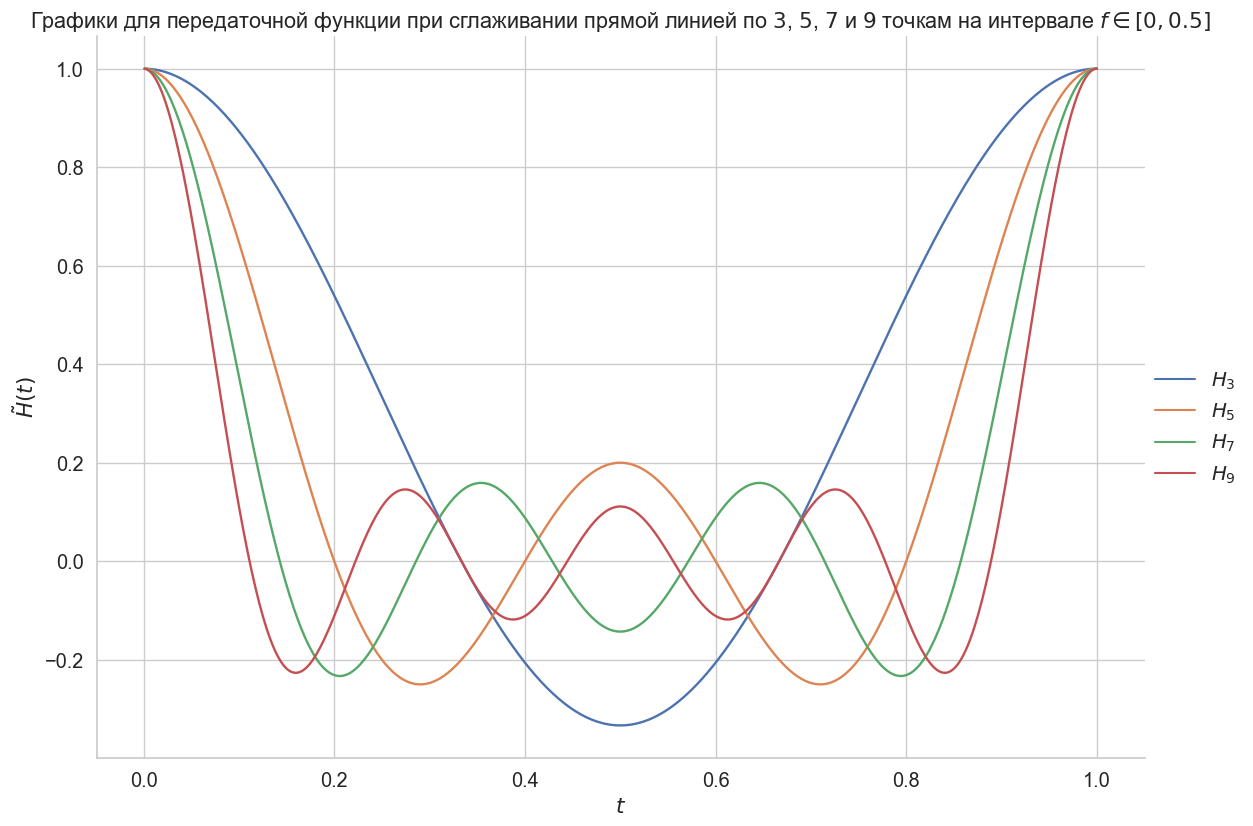

In [5]:
plot(df_p1, r"Графики для передаточной функции при сглаживании прямой линией по $3$, $5$, $7$ и $9$ точкам на интервале $f \in [0, 0.5]$")

Исследуя графики можно заметить, что за один период каждая из передаточных функций имеет ровно столько экстремумов, столько было использовано точек для ее построения, следовательно: чем больше экстремумов, тем больше колебаний. Порядок гладкости увеличивается с увеличением количества точек для построения функции.

### Пункт 2

$\bullet$ Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\displaystyle \tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

$$\text{Входной сигнал: } s(t) $$

$$\text{Выходной сигнал: } y(t) = A + Bt + Ct^2$$

Если осуществлять приближение по МНК прямой по $m$ точкам, то необходимо минимизировать следующее выражение для нечётных чисел:

$$\displaystyle F(A,B,C) = \sum_{k=-m}^m \big(s_k - A - Bk - Ck^2\big)^2 \rightarrow min$$

Переменными в этой задаче являются коэффициенты $A,C$  прямой линии. Продифференцируем и приравняем к нулю, чтобы найти минимум.

$$
\begin{cases}
    \displaystyle \frac{\partial F(A,B,C)}{\partial A} = 0       \\
    \displaystyle \frac{\partial F(A,B,C)}{\partial C} = 0
  \end{cases} \iff 
  \begin{cases}
    \displaystyle -2 \sum_{k=-m}^m \big(s_k - A - Bk - Ck^2\big) = 0       \\
    \displaystyle -2 \sum_{k=-m}^m \big(k^2s_k - k^2A - Bk^3 - Ck^4\big) = 0
  \end{cases} \iff 
  \begin{cases}
    \displaystyle -\sum_{k=-m}^m s_k + \sum_{k=-m}^m A + \sum_{k=-m}^m Bk + \sum_{k=-m}^m Ck^2 = 0       \\
    \displaystyle -\sum_{k=-m}^m k^2s_k + \sum_{k=-m}^m k^2A + \sum_{k=-m}^m Bk^3 + \sum_{k=-m}^m Ck^4 = 0
  \end{cases} $$ 

Система нормальных уравнений:

$$
\begin{cases}
    \displaystyle \big(2m + 1\big)\cdot A + \frac{m(m+1)\cdot(2m+1)}{3}       \\
    \displaystyle \frac{m(m+1)\cdot(2m+1)}{3}\cdot A + \frac{m(m+1)\cdot(2m+1)\cdot(3m^2 + 3m -1)}{15}\cdot C = \sum_{k=-m}^m k^2s_k
  \end{cases}$$

Положим $\displaystyle \frac{m(m+1)\cdot(2m+1)}{3}\cdot C$ во второе уравнение:

$$\displaystyle \Bigg(\frac{m(m+1)\cdot(2m+1)}{3} - \frac{(3m^2 + 3m -1)\cdot(2m+1)}{5}\Bigg)\cdot A = \sum_{k=-m}^m k^2s_k - \frac{3m^2 + 3m -1}{5} \sum_{k=-m}^m s_k$$

Тогда:

$$\displaystyle A = \frac{\sum_{k=-m}^m k^2s_k - \frac{3m^2 + 3m -1}{5}\sum_{k=-m}^m s_k}{\frac{m(m+1)(2m+1)}{3} - \frac{(3m^2+3m-1)(2m+1)}{5}}$$

Получаем:

$$\displaystyle y_0 = A = \frac{\sum_{k=-m}^m k^2s_k - \frac{3m^2 + 3m -1}{5}\sum_{k=-m}^m s_k}{\frac{m(m+1)(2m+1)}{3} - \frac{(3m^2+3m-1)(2m+1)}{5}}$$

$$\displaystyle y_7 = A = \frac{\sum_{k=-3}^3 k^2s_k - 7\sum_{k=-3}^3 s_k}{28-49} = \frac{1}{21} \Bigg(7\sum_{k=-3}^3 s_k - \sum_{k=-3}^3 k^2s_k\Bigg) = \\ = \frac{1}{21} \big(7s_{-3} + 7s_{-2} + 7s_{-1} + 7s_0 +7s_1 + 7s_2 + 7s_3 - 9s_{-3} - 4s_{-2} -s_1 - 4s_2 - 9s_3\big) = \\ = \frac{1}{21} \big(-2s_{-3} + 3s_{-2} + s_{-1} + 7s_0 + 6s_1 + 3s_2 + 2s_3\big) = y_7$$

$$\displaystyle s_n = e^{i\omega n}$$

$$\displaystyle y_n = \frac{1}{21} \big(-2e^{-3i\omega} + 3e^{-2i\omega} + 6e^{-i\omega} + 7 + 6e^{i\omega} +3e^{2i\omega} -2e^{3i\omega}\big)\cdot e^{i\omega n} = H(\omega)\cdot e^{i\omega n} \\ H(\omega) = \frac{1}{21}\big(-2e^{-3i\omega} + 3e^{-2i\omega} + 6e^{-i\omega} + 7 + 6e^{i\omega} +3e^{2i\omega} -2e^{3i\omega}\big) \\ H(\omega) = \frac{1}{21} \big(7 + 12cos(\omega) + 6 cos(2\omega) - 4cos(3\omega)\big) \\ H(\omega) = H(2\pi f) = \tilde H(f)$$

Формула для 7 точек:

$$\displaystyle H_7(f) = \frac{1}{21} \bigg(7 + 12cos\big(2\pi f\big) + 6cos\big(4\pi f\big) - 4cos\big(6\pi f\big)\bigg)$$

Формула для 9 точек:

$$\displaystyle H_9(f) = \frac{1}{231} \bigg(59 + 108cos\big(2\pi f\big) + 78cos\big(4\pi f\big) + 28cos\big(6\pi f\big) - 42cos\big(8\pi f\big)\bigg)$$

Формула для 11 точек:

$$\displaystyle H_{11}(f) = \frac{1}{429} \bigg(89 + 168cos\big(2\pi f\big) + 138cos\big(4\pi f\big) + 88cos\big(6\pi f\big) + 18cos\big(8\pi f\big) - 72cos\big(10\pi f\big)\bigg)$$

Формула для 13 точек:

$$\displaystyle H_{13}(f) = \frac{1}{143} \bigg(25 + 48cos\big(2\pi f\big) + 42cos\big(4\pi f\big) + 32cos\big(6\pi f\big) + 18cos\big(8\pi f\big)\bigg)$$

In [6]:
H_5 = lambda f: 1/35 * (17 + 24*np.cos(2*pi*f) - 6*np.cos(4*pi*f))
H_7 = lambda f: 1/21 * (7 + 12*np.cos(2*pi*f) + 6*np.cos(4*pi*f) - 4*np.cos(6*pi*f))
H_9 = lambda f: 1/231 * (59 + 108*np.cos(2*pi*f) + 78*np.cos(4*pi*f) + 28*np.cos(6*pi*f) - 42*np.cos(8*pi*f))
H_11 = lambda f: 1/429 * (89 + 168*np.cos(2*pi*f) + 138*np.cos(4*pi*f) + 88*np.cos(6*pi*f) + 18*np.cos(8*pi*f) - 72*np.cos(10*pi*f))
H_13 = lambda f: 1/143 * (25 + 48*np.cos(2*pi*f) + 42*np.cos(4*pi*f) + 32*np.cos(6*pi*f) + 18*np.cos(8*pi*f) - 22*np.cos(10*pi*f))

df = pd.DataFrame({'t': t, r'$H_7$': H_7(t), r'$H_9$': H_9(t), r'$H_{11}$': H_11(t), r'$H_{13}$': H_13(t)})
df_log = pd.DataFrame({'t': t, r'$H_7$': 20*np.log10(np.abs(H_7(t))), r'$H_9$': 20*np.log10(np.abs(H_9(t))),
                       r'$H_{11}$': 20*np.log10(np.abs(H_11(t))), r'$H_{13}$': 20*np.log10(np.abs(H_13(t)))})

df_p2 = df.melt(id_vars='t', var_name='', value_name='vals')
df_p2_log = df_log.melt(id_vars='t', var_name='', value_name='vals')

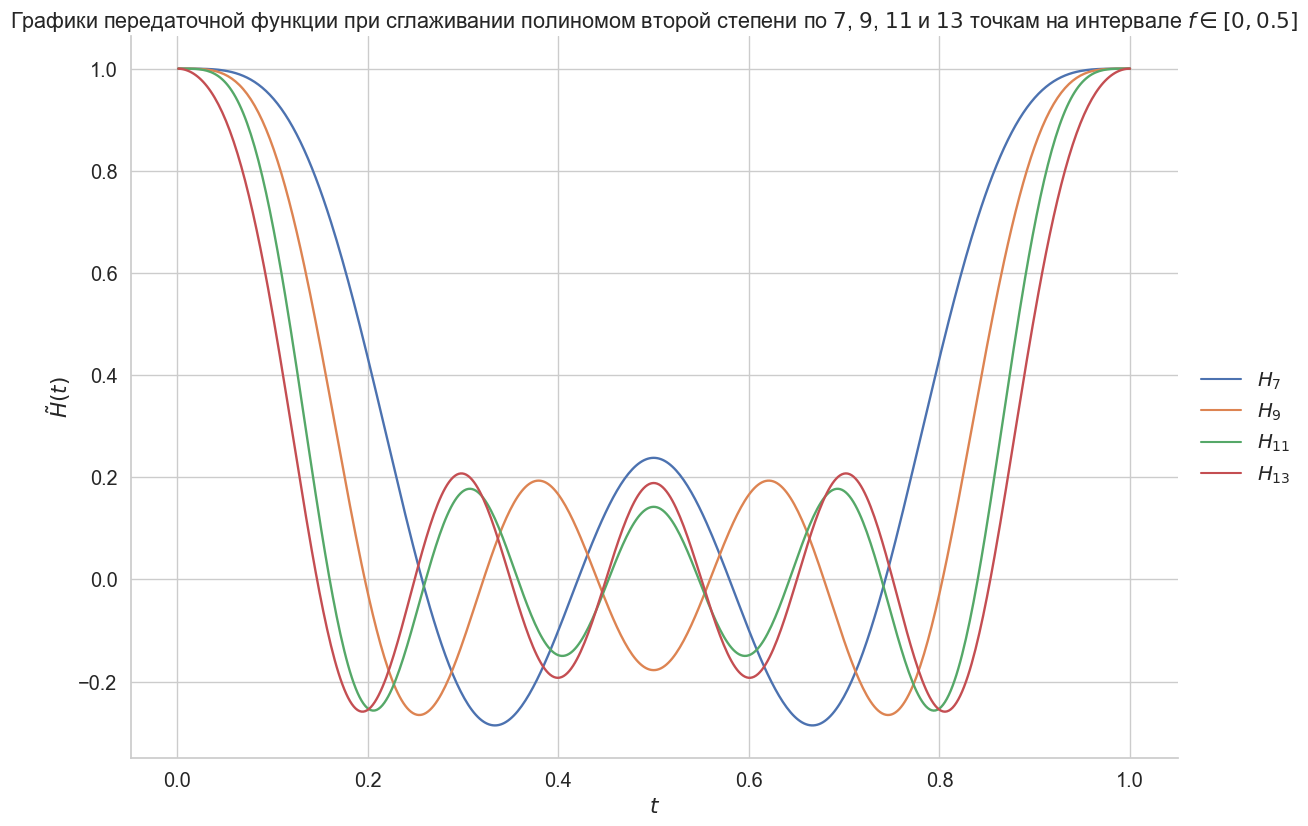

In [7]:
plot(df_p2, r"Графики передаточной функции при сглаживании полиномом второй степени по $7$, $9$, $11$ и $13$ точкам на интервале $f \in [0, 0.5]$")

Исследуя графики можно заметить, что передаточные функции для большего количества точек имеют большую частоту колебаний, а также с увеличением частоты сигнала передаточные функции быстрее уменьшаются в амплитуде. Окно частот, для которых почти не происходит приглушения, шире, чем при сглаживании прямой линией.

### Пункт 3

$\bullet$ Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\displaystyle \tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

$$\text{Входной сигнал: } s(t) $$

$$\text{Выходной сигнал: } y(t) = A + Bt + Ct^2$$

Если осуществлять приближение по МНК прямой линией по $m$ точкам, то необходимо минимизировать следующее выражение для нечётных чисел:

$$\displaystyle F(A,B,C) = \sum_{k=-m}^m \big(s_k - A - Bk - Ck^2 + Dk^3 + Ek^4\big) \rightarrow min$$

$$
\begin{cases}
    \displaystyle \frac{\partial F(A,B,C,D,E)}{\partial A} = 0       \\
    \displaystyle \frac{\partial F(A,B,C,D,E)}{\partial C} = 0       \\
    \displaystyle \frac{\partial F(A,B,C,D,E)}{\partial E} = 0
  \end{cases} \iff 
  \begin{cases}
    \displaystyle -2 \sum_{k=-m}^m \big(s_k - A - Bk - Ck^2 -Dk^3 - Ek^4\big) = 0       \\
    \displaystyle -2 \sum_{k=-m}^m \big(k^2s_k - k^2A - Bk^3 - Ck^4 -Dk^5 - Ek^6\big) = 0 \\
    \displaystyle -2 \sum_{k=-m}^m \big(k^4s_k - k^4A - Bk^5 - Ck^6 -Dk^7 - Ek^8\big) = 0
  \end{cases} \iff 
  \begin{cases}
    \displaystyle - \sum_{k=-m}^m s_k + \sum_{k=-m}^m A \sum_{k=-m}^m Bk + \sum_{k=-m}^m Ck^2 + \sum_{k=-m}^m Dk^3 + \sum_{k=-m}^m Ek^4 = 0       \\
    \displaystyle - \sum_{k=-m}^m k^2s_k + \sum_{k=-m}^m k^2A + \sum_{k=-m}^m Bk^3 + \sum_{k=-m}^m Ck^4 + \sum_{k=-m}^m Dk^5 + \sum_{k=-m}^m Ek^6  = 0 \\
    \displaystyle - \sum_{k=-m}^m k^4s_k + \sum_{k=-m}^m k^4A + \sum_{k=-m}^m Bk^5 + \sum_{k=-m}^m Ck^6 + \sum_{k=-m}^m Dk^7 + \sum_{k=-m}^m Ek^8 = 0
  \end{cases} \iff 
  \begin{cases}
    \displaystyle -\sum_{k=-m}^m s_k + \sum_{k=-m}^m A + \sum_{k=-m}^m Ck^2 + \sum_{k=-m}^m Ek^4 = 0       \\
    \displaystyle -\sum_{k=-m}^m k^2s_k + \sum_{k=-m}^m k^2A + \sum_{k=-m}^m Ck^4 + \sum_{k=-m}^m Ek^6 = 0 \\
    \displaystyle -\sum_{k=-m}^m k^4s_k + \sum_{k=-m}^m K^4A + \sum_{k=-m}^m Ck^6 + \sum_{k=-m}^m Ek^8 = 0
  \end{cases} $$ 

Система нормальных уравнений:

$$
\begin{cases}
    \displaystyle \textbf{(1) }\big(2m+1\big)\cdot A + \frac{m(m+1)(2m+1)}{3}\cdot C + \frac{m(m+1)(2m+1)(3m^2 + 3m - 1)}{15}\cdot F = \sum_{k=-m}^m s_k       \\
    \displaystyle \textbf{(2) } \frac{m(m=1)(2m+1)}{3}\cdot A + \frac{m(m+1)(2m+1)(3m^2 + 3m - 1)}{15}\cdot C + \frac{m(m+1)(2m+1)(1 - 3m +6m^3 +3m^4)}{21}\cdot F= \sum_{k=-m}^m k^2s_k   \\
    \displaystyle \textbf{(3) } \frac{m(m+1)(2m+1)(3m^2 + 3m - 1)}{15}\cdot A + \frac{m(m+1)(2m+1)(1 - 3m +6m^3 + 3m^4)}{21}\cdot C + \frac{m(m+1)(2m+1)(-3m + 9m -m^2 - 15m^3 +5m^4 + 15m^5 + 5m^6)}{45} = \sum_{k=-m}^m k^4s_k
  \end{cases}$$

Выразим $C$ из первого уравнения:

$$\displaystyle C = \frac{-15A -30Am + Em - 10Em^3 - 15Em^4 -6Em^4 - 15\sum_{k=-m}^m s_k}{5m(m+1)(2m+1)}$$

Положим $C$ во второе и третье уравнение:

$$
\begin{cases}
    \displaystyle \frac{\big(-3 - 2m +12m^2 +8m^3\big)\big(-35A + 3Em\big(-2 - m +2m62 +m^3\big)\big)}{525} + \frac{3m^2 + 3m -1}{5}\sum_{k=-m}^m s_k = \sum_{k=-m}^m k^2 k^2s_k    \\
    \displaystyle -\frac{\Big(-3 -2m +12m62 +8m^3\Big)}{315}\cdot \Big(3A\Big(6m^2 + 6m -5\Big) + Em\Big(-6 +m +12m^2 +m^3 -6m^4 -2m^5\Big)\Big) + \frac{1-3m+6m^3 +3m^4}{7}\sum_{k=-m}^m s_k = \sum_{k=-m}^m k^4s_k    \\
    \displaystyle 
  \end{cases}$$

Выразим из второго уравнения $E$ и положим в третье уравнение, затем выразим из третьего уравнения $A$:

$$\displaystyle y_0 = 15\cdot\Bigg(\frac{\big(12+5m\big(1+m\big)\big(-10+3m\big(1+m\big)\big)\big) \sum_{k=-m}^m s_k}{4\big(-3+2m\big)\big(-1+2m\big)\big(1+2m\big)\big(3+2m\big)\big(5+2m\big)} - \frac{35\big(-3+2m\big(1+m\big)\big)\sum_{k=-m}^m k^2s_k -63\sum_{k=-m}^m k^4s_k}{4\big(-3+2m\big)\big(-1+2m\big)\big(1+2m\big)\big(3+2m\big)\big(5+2m\big)}\Bigg)$$

Для 9 точек:

$$\displaystyle y_9 = \frac{1}{429}\Bigg(179\sum_{k=-4}^4 s_k - \frac{1}{4}\bigg(185\sum_{k=-4}^4 k^2 s_k - 9\sum_{k=-4}^4 k^4 s_k\bigg)\Bigg) \\ y_9 = \frac{1}{429} \big(15s_{-4}-55s_{-3} +30s_{-2} +135s_{-1}+179s_0 + 135s_1 + 30s_2 -55s_3 +15s_4\big)$$

В общем случае:

$$\displaystyle y_n = \frac{1}{429}\big(15s_{n-4}-55s_{n-3} +30s_{n-2} +135s_{n-1}+179s_n + 135s_{n+1} + 30s_{n+2} -55s_{n+3} +15s_{n+4}\big) \\ s_n = e^{i\omega n} \\ y_n = \frac{1}{429}\big(15e^{-4i\omega} -55e^{3i\omega} + 15e{4i\omega}\big)\cdot e^{i\omega n} = H(\omega)\cdot e^{i\omega n} \\ H(\omega) = \frac{1}{429}\big(15s_{n-4}-55s_{n-3} +30s_{n-2} +135s_{n-1}+179s_n + 135s_{n+1} + 30s_{n+2} -55s_{n+3} +15s_{n+4}\big) \\ H(\omega) = \frac{1}{429} \big(179+270cos(\omega) +60cos(2\omega) -110cos(3\omega)+30cos(4\omega)\big) \\ H(\omega) = H(2\pi f) = \tilde H(f)$$

Формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени по:

9 точкам:

$$\displaystyle H_9(f) = \frac{1}{429}\Big(179 + 270cos\big(2\pi f\big) + 60 cos\big(4\pi f\big) - 110 cos\big(6 \pi f\big) + 30 cos\big(8\pi f\big)\Big)$$
    
11 точкам:

$$\displaystyle H_{11}(f) = \frac{1}{429}\Big(143 + 240cos\big(2\pi f\big) + 120 cos\big(4\pi f\big) - 20 cos\big(6 \pi f\big) - 90 cos\big(8\pi f\big) + 36cos\big(10\pi f\big)\Big)$$
    
13 точкам:
    
$$\displaystyle H_{13}(f) = \frac{1}{2431}\Big(677 + 1200 cos\big(2\pi f\big) + 780 cos\big(4\pi f\big) + 220 cos\big(6 \pi f\big) - 270 cos\big(8\pi f\big) - 396 cos\big(10\pi f\big) + 220 cos(12\pi f)\Big)$$
    
15 точкам:

$$\displaystyle H_{15}(f) = \frac{1}{46189}\Big(11063 + 20250 cos\big(2\pi f\big) + 15000 cos\big(4\pi f\big) + 7510 cos\big(6 \pi f\big) - 330 cos\big(8\pi f\big) - 5874 cos\big(10\pi f\big) + 5720 cos(12\pi f) + 4290 cos(14\pi f)\Big)$$

In [8]:
H_7 = lambda f: 1 / 231 * (131 + 150*np.cos(2*pi*f) - 60*np.cos(4*pi*f) + 10*np.cos(6*pi*f))
H_9 = lambda f: 1 / 429 * (179 + 270*np.cos(2*pi*f) + 60*np.cos(4*pi*f) - 110*np.cos(6*pi*f) + 30*np.cos(8*pi*f))
H_11 = lambda f: 1 / 429 * (143 + 240*np.cos(2*pi*f) + 120*np.cos(4*pi*f) - 20*np.cos(6*pi*f) - 90*np.cos(8*pi*f) + 36*np.cos(10*pi*f))
H_13 = lambda f: 1 / 2431 * (677 + 1200*np.cos(2*pi*f) + 780*np.cos(4*pi*f) + 220*np.cos(6*pi*f) - 270*np.cos(8*pi*f) - 396*np.cos(10*pi*f) + 220*np.cos(12*pi*f))
H_15 = lambda f: 1 / 46189 * (11063 + 20250*np.cos(2*pi*f) + 15000*np.cos(4*pi*f) + 7510*np.cos(6*pi*f) - 330*np.cos(8*pi*f) - 5874*np.cos(10*pi*f) - 5720*np.cos(12*pi*f) + 4290*np.cos(14*pi*f))

df = pd.DataFrame({'t': t, r'$H_9$': H_9(t), r'$H_{11}$': H_11(t), r'$H_{13}$': H_13(t), r'$H_{15}$': H_15(t)})
df_log = pd.DataFrame({'t': t, r'$H_9$': 20*np.log10(np.abs(H_9(t))), r'$H_{11}$': 20*np.log10(np.abs(H_11(t))),
                       r'$H_{13}$': 20*np.log10(np.abs(H_13(t))), r'$H_{15}$': 20*np.log10(np.abs(H_15(t)))})

df_p3 = df.melt(id_vars='t', var_name='', value_name='vals')
df_p3_log = df_log.melt(id_vars='t', var_name='', value_name='vals')

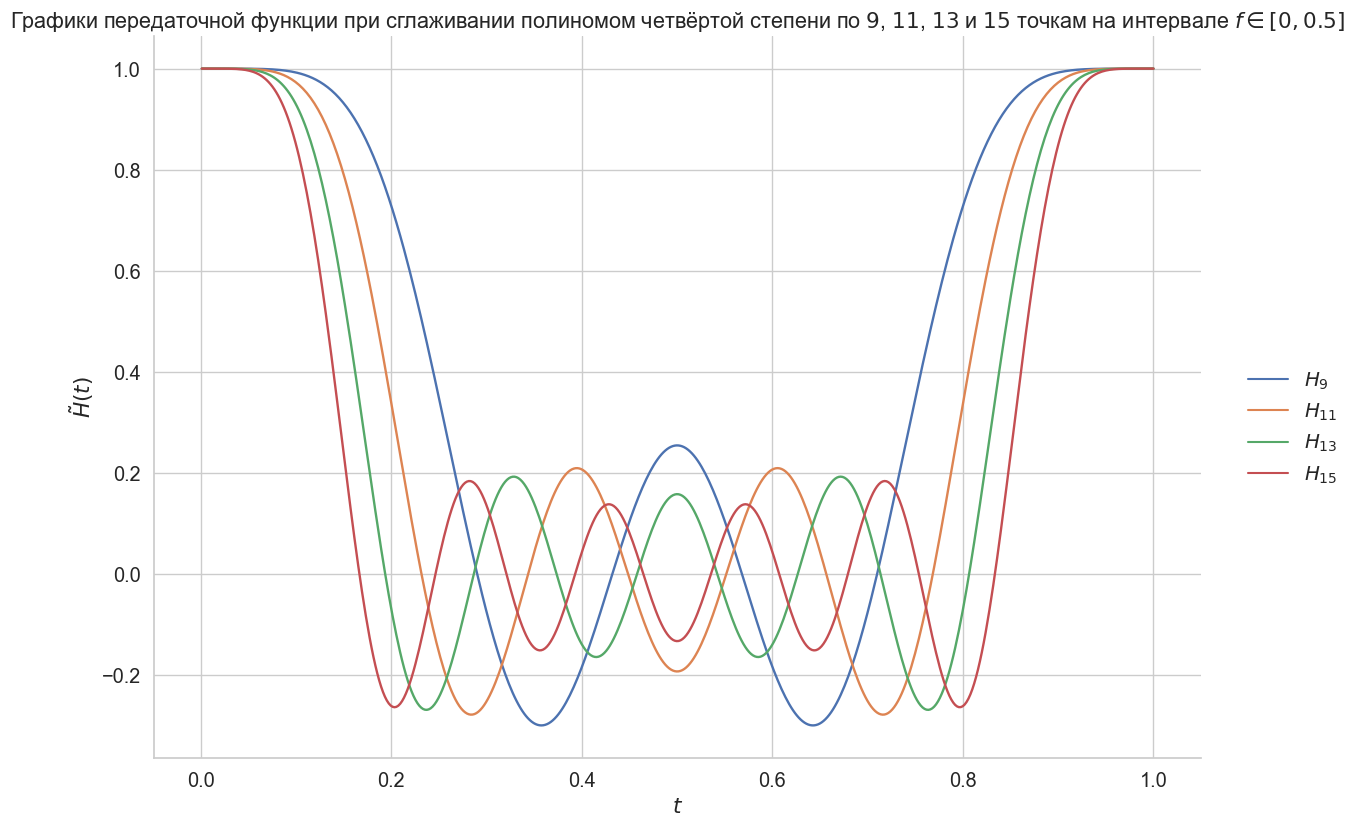

In [9]:
plot(df_p3, r"Графики передаточной функции при сглаживании полиномом четвёртой степени по $9$, $11$, $13$ и $15$ точкам на интервале $f \in [0, 0.5]$")

Исследуя графики можно заметить, что передаточные функции для большего количества точек имеют большую частоту колебаний, а также с увеличением частоты сигнала передаточные функции быстрее уменьшаются в амплитуде. Окно частот, для которых почти не происходит приглушения, шире, чем при сглаживании прямой линией.

### Пункт 4

$\bullet$ Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\displaystyle \tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

$$\displaystyle y_n = \frac{1}{320} = \big(-3s_{n-7}-6s_{n-6} - 5s_{n-5}+3s_{n-4}+21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_n + 67s_{n+1} +46s_{n+2} + 21s_{n+3} + 3s_{n+4}-5s_{n+4} -5s_{n+5}-6s_{n+6}-3s_{n+7}\big)$$

$$\displaystyle y_n = \frac{1}{350} \big(-s_{n-10} - 3s_{n-6} - 5s_{n-8} - 5s_{n-7}-2s_{n-6} +6s_{n-5}+18s_{n-4} + 33s_{n-3} + 47s_{n-2} +57s_{n-1} + 60s_n +57s_{n+1} + 47s_{n+2}+33s_{n+3}+18s_{n+4}+6s_{n+5} -2s_{n+6}-5s_{n+7}-5s_{n+8}-3s_{n+9}-s_{n+10}\big)$$

Соответствующе передаточные функции:

$$\displaystyle H_{15}(f) = \frac{1}{320} \Big(74 + 134 cos\big(2\pi f\big) + 92 cos\big(4\pi f\big) +42 cos\big(6\pi f\big) + 6 cos\big(8\pi f\big) -10 cos\big(10\pi f\big) -12 cos\big(12 \pi f\big) -6 cos\big(14 \pi f\big)\Big)$$

$$\displaystyle H_{21}(f) = \frac{1}{350}\Big(60 + 114 cos\big(2\pi f\big) + 94 cos\big(4\pi f\big) +66 cos\big(6\pi f\big) + 36 cos\big(8\pi f\big) +12 cos\big(10\pi f\big) - 4 cos\big(12\pi f\big)-10cos\big(14\pi f\big) - 10 cos\big(16\pi f\big) -6 cos\big(18\pi f\big) - 2 cos\big(20\pi f\big)\Big)$$

In [10]:
H_15 = lambda x: 1/320 * (74 + 134*np.cos(2*pi*x) + 92*np.cos(4*pi*x) + 42*np.cos(6*pi*x) + 6*np.cos(8*pi*x) - 10*np.cos(10*pi*x) - 12*np.cos(12*pi*x) - 6*np.cos(14*pi*x))
H_21 = lambda x: 1/350 * (60 + 114*np.cos(2*pi*x) + 94*np.cos(4*pi*x) + 66*np.cos(6*pi*x) + 36*np.cos(8*pi*x) + 12*np.cos(10*pi*x) - 4*np.cos(12*pi*x) - 10*np.cos(14*pi*x) - 10*np.cos(16*pi*x) - 6*np.cos(18*pi*x) - 2*np.cos(20*pi*x))    
t = np.linspace(0.001, 0.499, 100)

df = pd.DataFrame({'t': t, r'$H_{15}$': H_15(t), r'$H_{21}$': H_21(t)})
df_log = pd.DataFrame({'t': t, r'$H_{15}$': 20*np.log10(np.abs(H_15(t))), r'$H_{21}$': 20*np.log10(np.abs(H_21(t)))})

df_p4 = df.melt(id_vars='t', var_name='', value_name='vals')
df_p4_log = df_log.melt(id_vars='t', var_name='', value_name='vals')

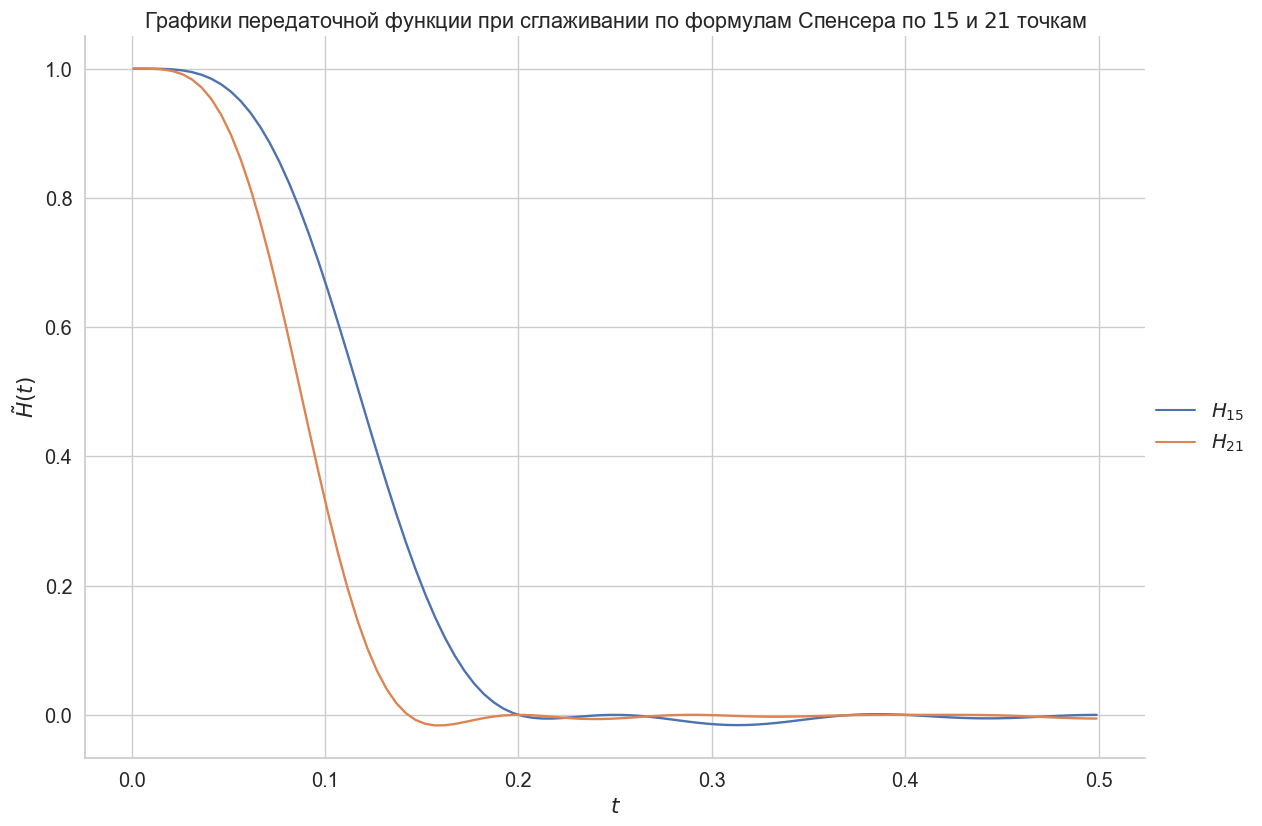

In [11]:
plot(df_p4, r"Графики передаточной функции при сглаживании по формулам Спенсера по $15$ и $21$ точкам")

Исследуя графики можно заметить, что передаточная функция для формулы $H_{21}(f)$ обладает большей частотой колебаний. Также её график быстрее уменьшается в амплитуде с увеличением частоты сигнала. 

Сравнивая данный результат с результатами в п. 1-3 можно заметить, что уменьшение амплитуды происходит быстрее при превышении оптимальной частоты.

### Пункт 5

$\bullet$ Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объяснить, чем отличаются данные графики от полученных ранее и объяснить их смысл.

$$\text{Значение в Дб: } \displaystyle 20 lg(\frac{|y_n|}{|s_n|})$$

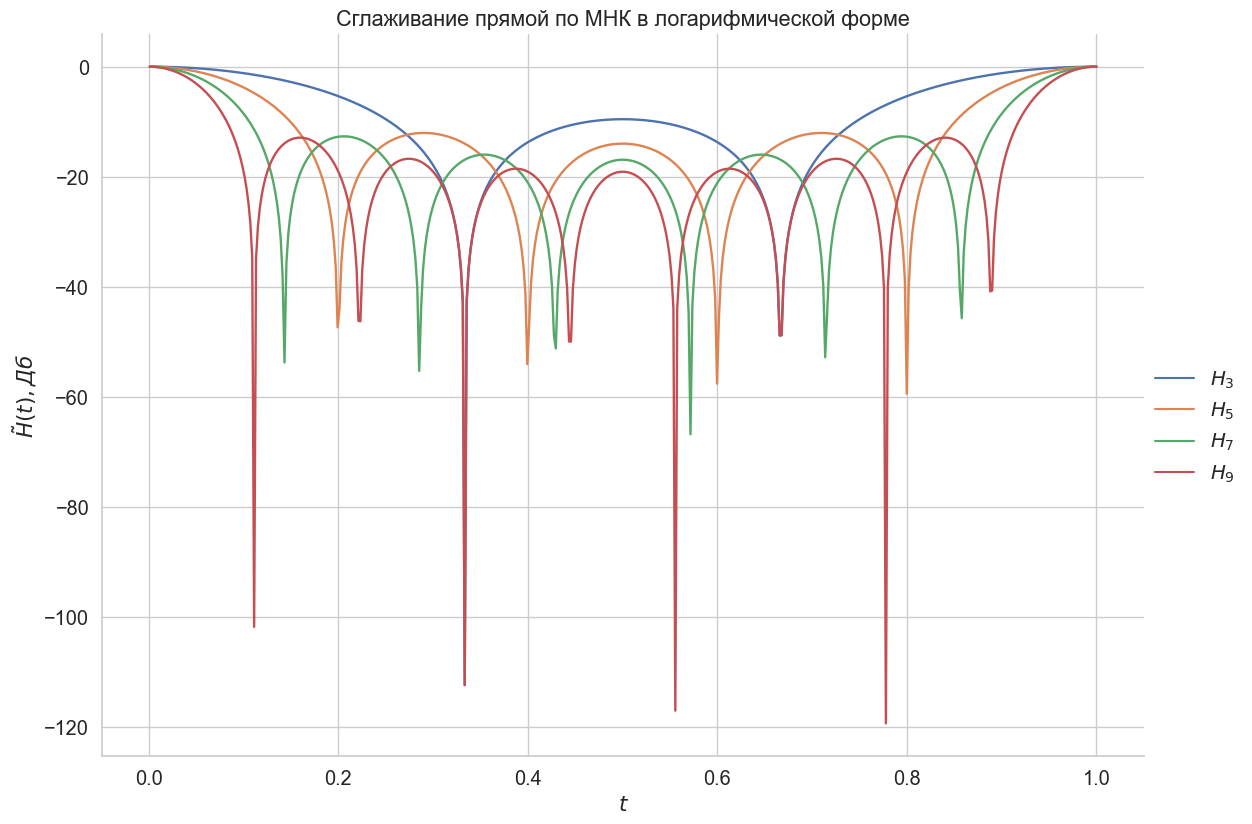

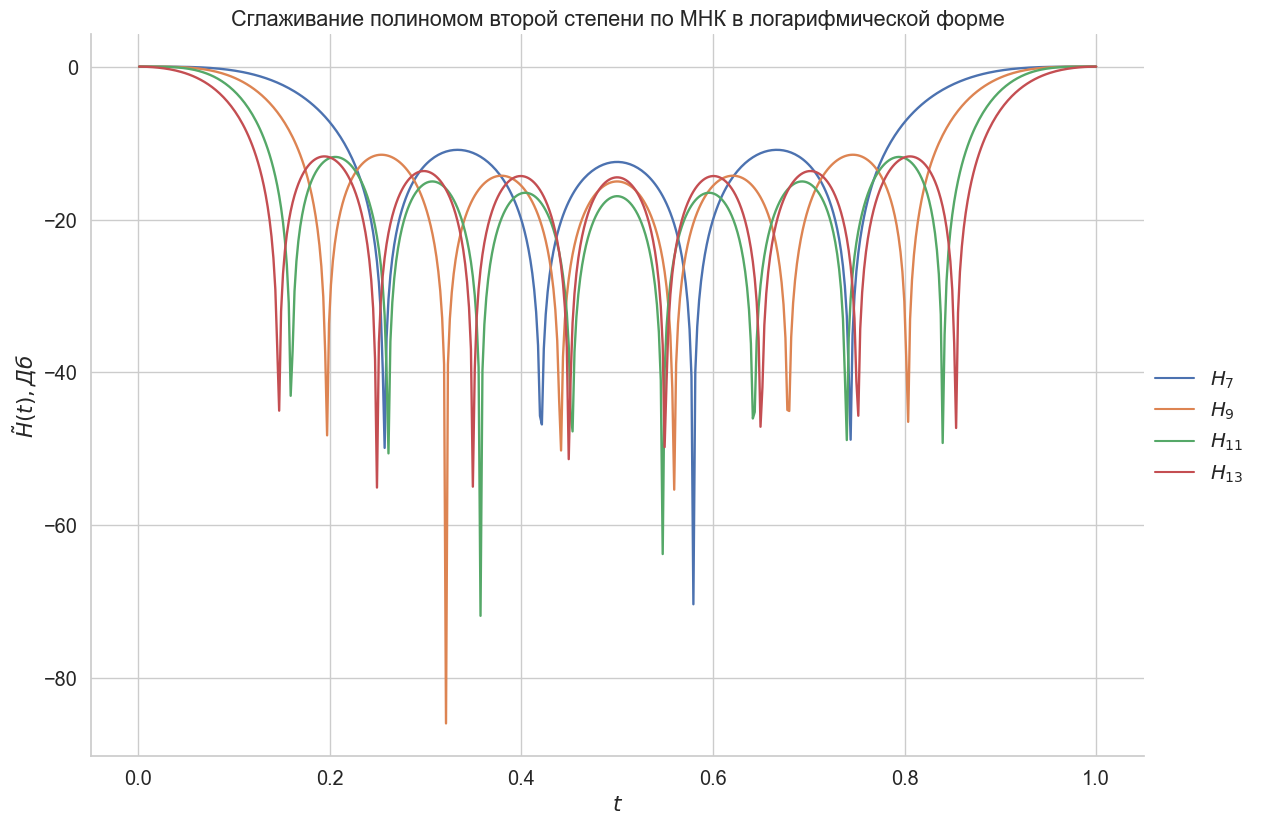

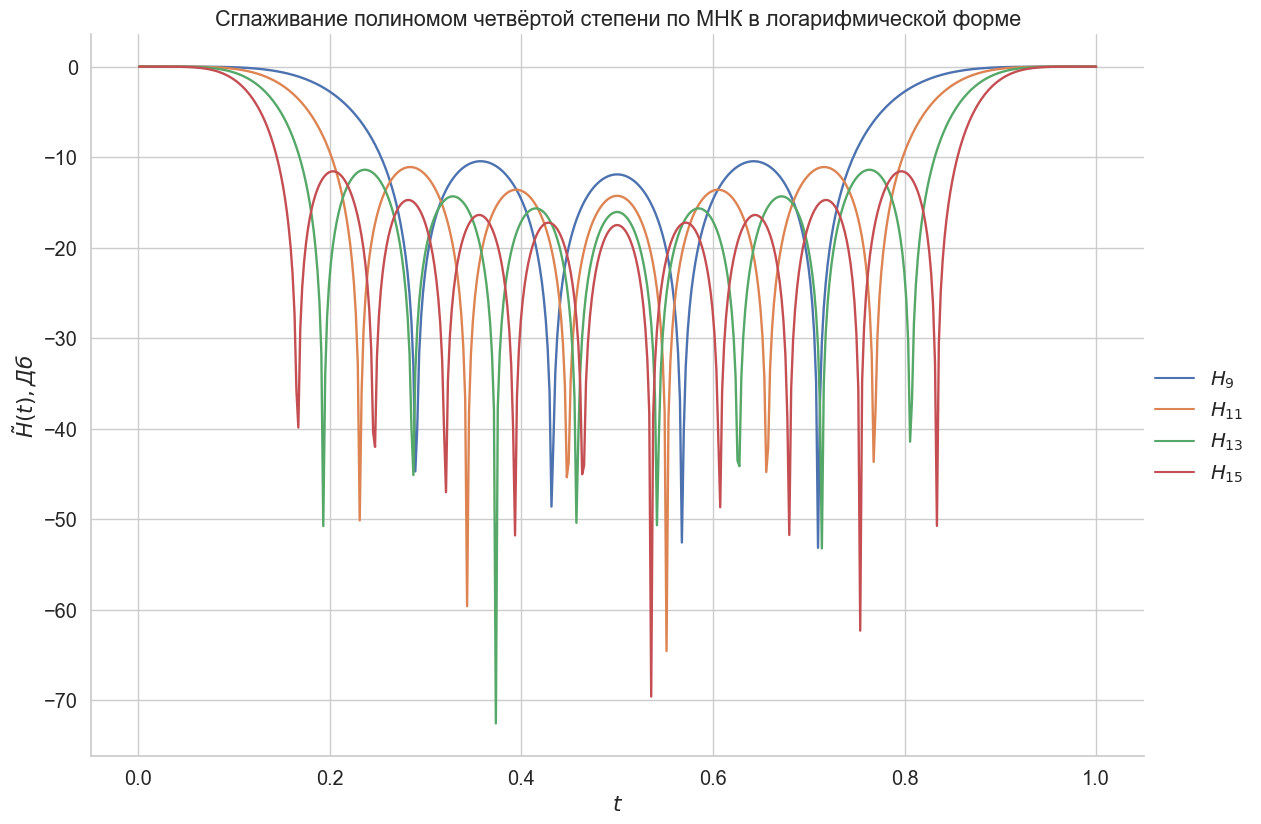

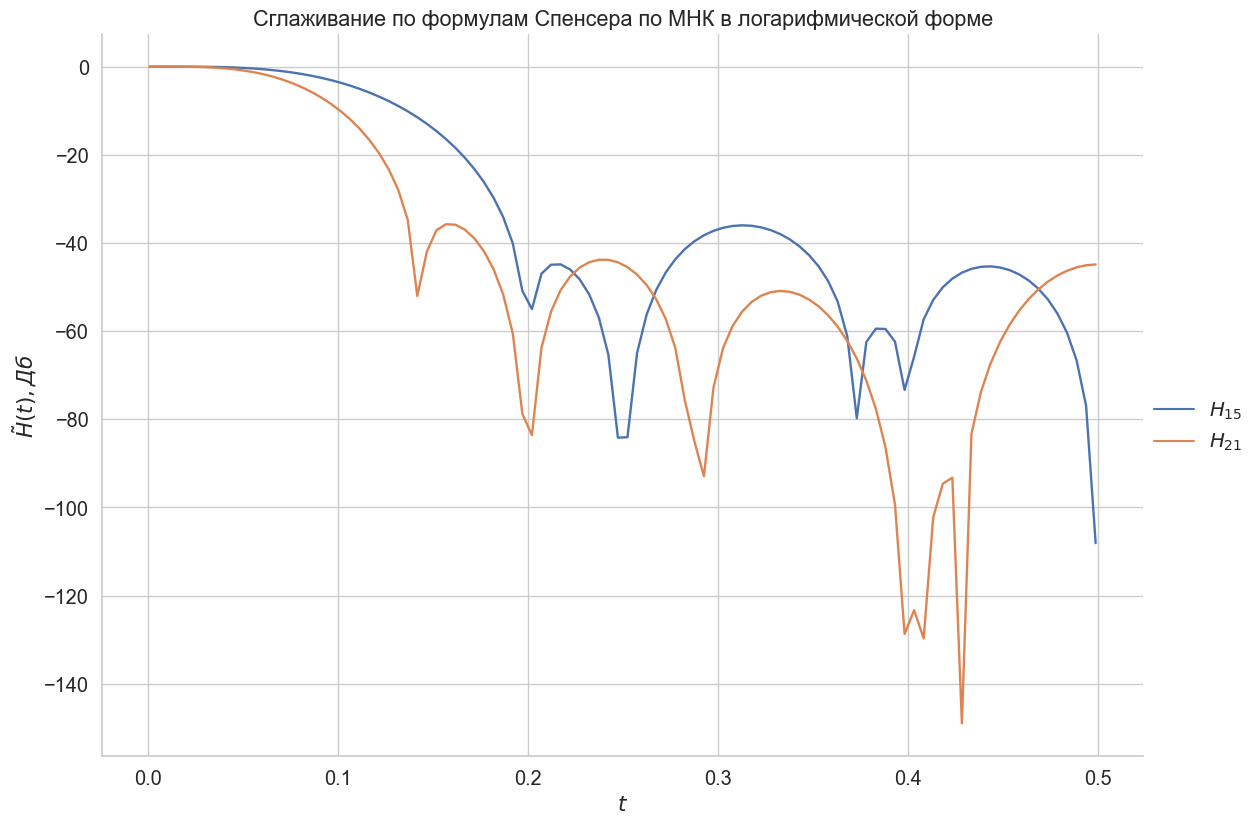

In [12]:
df_pi_log = [df_p1_log, df_p2_log, df_p3_log, df_p4_log]
titles = ["Сглаживание прямой по МНК в логарифмической форме", 
          "Сглаживание полиномом второй степени по МНК в логарифмической форме", 
          "Сглаживание полиномом четвёртой степени по МНК в логарифмической форме", 
          "Сглаживание по формулам Спенсера по МНК в логарифмической форме"]

for i in range(4):
    plot_log(df_pi_log[i], titles[i])

Анализируя данные графики и графики построенные выше, можно сказать, что графики, которые построенны выше - менее информативны, т.к. значения на высоких частотах сильно малы и поэтому невозможно сказать, что происходит на частоте выше, чем сигнал. Поэтому построение графиков в логарифмической шкале приоритетно.

### Пункт 6

$\bullet$ Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1-4.

В результате проведения сопоставительного анализа свойств передаточных функций было выявлено, что:

1. При увеличении степени полинома, который используется для сглаживания, происходит увеличение размера окна низких частот, для которых почти не происходит приглушение входного сигнала. 

2. Увеличение количества точек ведёт к тому, что кривые передаточных функций спадают более резко

3. При использовании фильтра, который соответствует сглаживанию по формулам Спенсера, уменьшение амплитуды происходит гораздо быстрее, чем при использовании других фильтров.


## Выводы

В ходе лабораторной работы был проведён анализ частотных характеристик известных формул полиномиального сглаживания временных рядов. Были построены соответствующие графики.